In [1]:
#Business Goal:
#Build a predictive model to identify who would be admitted

In [1]:
import pandas as pd
raw_df=pd.read_excel('hotel.xlsx')

In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LeadTime                2001 non-null   int64 
 1   Meal                    2001 non-null   object
 2   Country                 1978 non-null   object
 3   IsRepeatedGuest         2001 non-null   int64 
 4   DaysInWaitingList       2001 non-null   int64 
 5   ReservedRoomType        2001 non-null   object
 6   BookingChanges          2001 non-null   int64 
 7   CustomerType            2001 non-null   object
 8   TotalOfSpecialRequests  2001 non-null   int64 
 9   IsCanceled              2001 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 156.5+ KB


In [3]:
raw_df.head()

,LeadTime,Meal,Country,IsRepeatedGuest,DaysInWaitingList,ReservedRoomType,BookingChanges,CustomerType,TotalOfSpecialRequests,IsCanceled
0,228,bb,USA,1,18,e,0,group,3,0
1,315,hb,PRT,0,12,c,6,group,11,1
2,125,fb,OMN,1,25,c,4,contract,7,1
3,358,no meal,CHE,1,27,c,1,transient,11,1
4,174,no meal,ESP,0,22,d,3,transient,2,1


In [5]:
raw_df

,LeadTime,Meal,Country,IsRepeatedGuest,DaysInWaitingList,ReservedRoomType,BookingChanges,CustomerType,TotalOfSpecialRequests,IsCanceled
0,228,bb,USA,1,18,e,0,group,3,0
1,315,hb,PRT,0,12,c,6,group,11,1
2,125,fb,OMN,1,25,c,4,contract,7,1
3,358,no meal,CHE,1,27,c,1,transient,11,1
4,174,no meal,ESP,0,22,d,3,transient,2,1
...,...,...,...,...,...,...,...,...,...,...
1996,227,no meal,PRT,1,9,d,7,contract,8,1
1997,9,no meal,ESP,0,18,a,3,group,12,1
1998,357,no meal,PRT,1,30,d,1,group,6,1
1999,265,fb,CN,0,33,f,4,group,2,0


In [7]:
##------------------------------------------
##  Identify the Class Label or Y variable
##------------------------------------------
Y = raw_df.IsCanceled.astype('category')

print(Y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 2001 entries, 0 to 2000
Series name: IsCanceled
Non-Null Count  Dtype   
--------------  -----   
2001 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None


In [8]:
##-------------------------------------------------------------------
##  Select the Predictor Variables into a list called X_features
##--------------------------------------------------------------------
X_features = list( raw_df.columns )
X_features.remove( 'IsCanceled' )
X_features.remove( 'Country')

In [9]:
print(X_features)

['LeadTime', 'Meal', 'IsRepeatedGuest', 'DaysInWaitingList', 'ReservedRoomType', 'BookingChanges', 'CustomerType', 'TotalOfSpecialRequests']


In [10]:
##------------------------------------------
##  Set up a dataframe with only X-variables
##------------------------------------------
X =  raw_df[X_features]


In [11]:
##-----------------------------------------
##  Split the Data into Training and Test
##  test size=0.3 indicates 70% training and
##  30% test data
##-----------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
Y,
test_size = 0.3,
random_state = 500)
print(y_train.info())

##############################################################################
##  All data processing should be done after split to prevent data leakage  ##
##############################################################################

<class 'pandas.core.series.Series'>
Index: 1400 entries, 1313 to 858
Series name: IsCanceled
Non-Null Count  Dtype   
--------------  -----   
1400 non-null   category
dtypes: category(1)
memory usage: 12.4 KB
None


In [13]:
##############################################################################
##  Pre-process X-vars   ##
##############################################################################

##-----------------------------------------------------------------------
##  1. Identify and dummy code (one-hot encoding) the categorical column
##-----------------------------------------------------------------------
# List of categorical columns
categorical_columns = ['CustomerType','ReservedRoomType','Meal']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns,drop_first = True,dtype=int )
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns,drop_first = True ,dtype=int)

In [14]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 1313 to 858
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   LeadTime                1400 non-null   int64
 1   IsRepeatedGuest         1400 non-null   int64
 2   DaysInWaitingList       1400 non-null   int64
 3   BookingChanges          1400 non-null   int64
 4   TotalOfSpecialRequests  1400 non-null   int64
 5   CustomerType_group      1400 non-null   int32
 6   CustomerType_transient  1400 non-null   int32
 7   ReservedRoomType_b      1400 non-null   int32
 8   ReservedRoomType_c      1400 non-null   int32
 9   ReservedRoomType_d      1400 non-null   int32
 10  ReservedRoomType_e      1400 non-null   int32
 11  ReservedRoomType_f      1400 non-null   int32
 12  Meal_fb                 1400 non-null   int32
 13  Meal_hb                 1400 non-null   int32
 14  Meal_no meal            1400 non-null   int32
dtypes: int32(10), int64(5)
m

In [15]:
X_train_encoded.head()

,LeadTime,IsRepeatedGuest,DaysInWaitingList,BookingChanges,TotalOfSpecialRequests,CustomerType_group,CustomerType_transient,ReservedRoomType_b,ReservedRoomType_c,ReservedRoomType_d,ReservedRoomType_e,ReservedRoomType_f,Meal_fb,Meal_hb,Meal_no meal
1313,396,1,24,2,4,1,0,1,0,0,0,0,1,0,0
330,339,1,20,6,0,1,0,0,0,0,0,0,0,0,0
1923,509,0,12,8,2,0,0,0,0,1,0,0,0,0,1
760,566,0,22,6,6,1,0,0,1,0,0,0,0,0,0
968,437,1,27,1,3,0,1,1,0,0,0,0,0,0,1


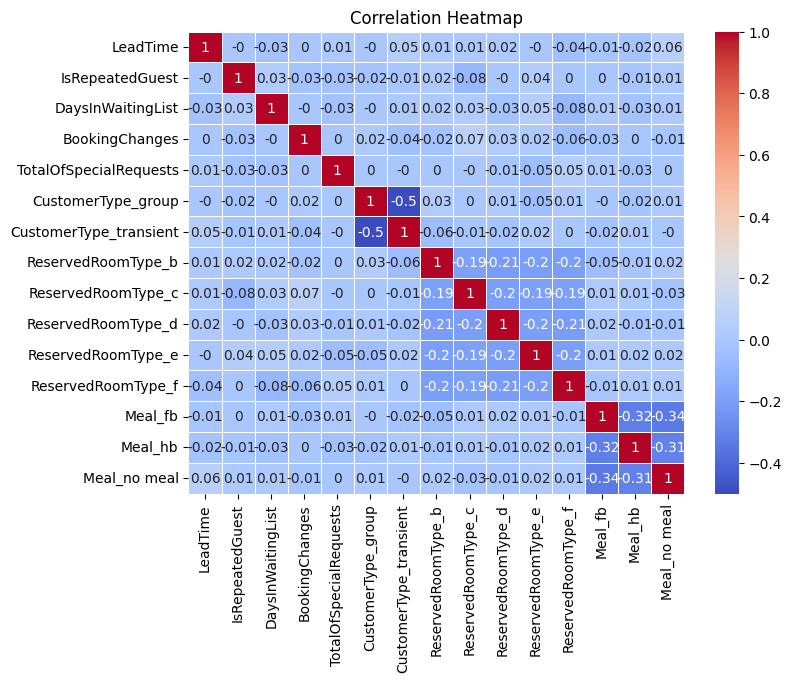

In [16]:
##-----------------------------------------------------------------------
##  2. Identify and and remove highly correlated columns
##-----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
corr_matrix.round(2)

,LeadTime,IsRepeatedGuest,DaysInWaitingList,BookingChanges,TotalOfSpecialRequests,CustomerType_group,CustomerType_transient,ReservedRoomType_b,ReservedRoomType_c,ReservedRoomType_d,ReservedRoomType_e,ReservedRoomType_f,Meal_fb,Meal_hb,Meal_no meal
LeadTime,1.00,-0.00,-0.03,0.00,0.01,-0.00,0.05,0.01,0.01,0.02,-0.00,-0.04,-0.01,-0.02,0.06
IsRepeatedGuest,-0.00,1.00,0.03,-0.03,-0.03,-0.02,-0.01,0.02,-0.08,-0.00,0.04,0.00,0.00,-0.01,0.01
DaysInWaitingList,-0.03,0.03,1.00,-0.00,-0.03,-0.00,0.01,0.02,0.03,-0.03,0.05,-0.08,0.01,-0.03,0.01
BookingChanges,0.00,-0.03,-0.00,1.00,0.00,0.02,-0.04,-0.02,0.07,0.03,0.02,-0.06,-0.03,0.00,-0.01
TotalOfSpecialRequests,0.01,-0.03,-0.03,0.00,1.00,0.00,-0.00,0.00,-0.00,-0.01,-0.05,0.05,0.01,-0.03,0.00
CustomerType_group,-0.00,-0.02,-0.00,0.02,0.00,1.00,-0.50,0.03,0.00,0.01,-0.05,0.01,-0.00,-0.02,0.01
CustomerType_transient,0.05,-0.01,0.01,-0.04,-0.00,-0.50,1.00,-0.06,-0.01,-0.02,0.02,0.00,-0.02,0.01,-0.00
ReservedRoomType_b,0.01,0.02,0.02,-0.02,0.00,0.03,-0.06,1.00,-0.19,-0.21,-0.20,-0.20,-0.05,-0.01,0.02
ReservedRoomType_c,0.01,-0.08,0.03,0.07,-0.00,0.00,-0.01,-0.19,1.00,-0.20,-0.19,-0.19,0.01,0.01,-0.03
ReservedRoomType_d,0.02,-0.00,-0.03,0.03,-0.01,0.01,-0.02,-0.21,-0.20,1.00,-0.20,-0.21,0.02,-0.01,-0.01


In [18]:
##-------------------------
##  Build the logit model
##-------------------------
import statsmodels.api as sm
##  Constant is to be added when using the sm library
X_train_encoded = sm.add_constant( X_train_encoded )
#Call Logistic regression with X and Y variables of the training data
# Model is built with the training data
logit = sm.Logit(y_train, X_train_encoded)
##  Fit the model and display results
logit_model = logit.fit()
print(logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.162520
         Iterations 9
                            Results: Logit
Model:                Logit             Method:            MLE        
Dependent Variable:   IsCanceled        Pseudo R-squared:  0.760      
Date:                 2024-09-27 08:44  AIC:               487.0552   
No. Observations:     1400              BIC:               570.9629   
Df Model:             15                Log-Likelihood:    -227.53    
Df Residuals:         1384              LL-Null:           -947.24    
Converged:            1.0000            LLR p-value:       5.4665e-298
No. Iterations:       9.0000            Scale:             1.0000     
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                  -6.1583   0.6982 -8.8198 0.0000 -7.5268 -4.7898
Lea

In [19]:
#Only significant X-vars are used to build the predictive model
#Only significant X-vars are used to build the predictive model
#Select the significant variables
significant_vars = ['const','IsRepeatedGuest','TotalOfSpecialRequests','Meal_no meal']
print(significant_vars)

['const', 'IsRepeatedGuest', 'TotalOfSpecialRequests', 'Meal_no meal']


In [20]:
##-------------------------------------------------------
##  Revise model to include only significant predictors
##-------------------------------------------------------
#final_logit holds the logistic regression equation aka -the model
#Only significant X-vars are used to build the predictive model
X_train_encoded = sm.add_constant(X_train_encoded)
final_logit_model = sm.Logit( y_train,X_train_encoded[significant_vars] ).fit()
print(final_logit_model.summary2())

Optimization terminated successfully.
         Current function value: 0.164349
         Iterations 9
                            Results: Logit
Model:                 Logit             Method:            MLE        
Dependent Variable:    IsCanceled        Pseudo R-squared:  0.757      
Date:                  2024-09-27 08:48  AIC:               468.1784   
No. Observations:      1400              BIC:               489.1553   
Df Model:              3                 Log-Likelihood:    -230.09    
Df Residuals:          1396              LL-Null:           -947.24    
Converged:             1.0000            LLR p-value:       1.0652e-310
No. Iterations:        9.0000            Scale:             1.0000     
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
const                  -6.5076   0.4730 -13.7580 0.0000 -7.4347

In [21]:
##----------------------------
##  Apply model on test data
##----------------------------
X_test_encoded=sm.add_constant(X_test_encoded)
#Make sure only the significant variables in the test data are selected
X_test_sig_vars=X_test_encoded[significant_vars]
X_test_sig_vars
y_prob=final_logit_model.predict(X_test_sig_vars)
#y_prob holds the probability values for each record in the test data

In [22]:
y_prob

83      0.999957
885     0.999478
1725    0.597522
660     0.855165
1776    0.999323
          ...   
1035    0.005899
1134    0.023056
1831    0.108228
1631    0.271822
958     0.597522
Length: 601, dtype: float64

In [23]:
#Create a dataframe to store the test data's Y value and the predicted probability value
#The original admit column is stored as "actual_Y"
#The predicted prob is stored in y_prob
y_pred_df = pd.DataFrame( { "actual_Y": y_test,
"predicted_prob":y_prob})


In [24]:
print(y_pred_df.head())

     actual_Y  predicted_prob
83          1        0.999957
885         1        0.999478
1725        0        0.597522
660         1        0.855165
1776        1        0.999323


In [25]:
##---------------------------------
##  Based on default cut-off -0.5
##---------------------------------
y_pred_df['predicted_Y'] = y_pred_df.predicted_prob.map(
lambda x: 1 if x >= 0.5 else 0)
print(y_pred_df.head())

     actual_Y  predicted_prob  predicted_Y
83          1        0.999957            1
885         1        0.999478            1
1725        0        0.597522            1
660         1        0.855165            1
1776        1        0.999323            1


In [26]:
from sklearn.metrics import confusion_matrix
# Generating the confusion matrix using the DataFrame columns
cm = confusion_matrix(y_pred_df['actual_Y'],y_pred_df['predicted_Y'])
print(cm)

[[214  31]
 [ 30 326]]


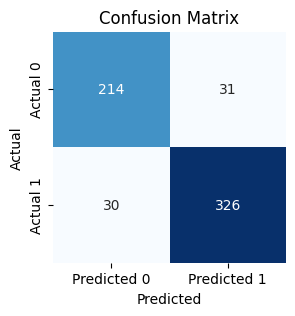

In [27]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
# Calculate Sensitivity (Recall), Specificity, and Accuracy using scikit-learn functions
from sklearn.metrics import  accuracy_score, recall_score, precision_score
sensitivity = recall_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])
accuracy = accuracy_score(y_pred_df['actual_Y'], y_pred_df['predicted_Y'])

# Print metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Sensitivity (Recall): 0.92
Accuracy: 0.90


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_pred_df['actual_Y'],y_pred_df['predicted_Y']))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       245
           1       0.91      0.92      0.91       356

    accuracy                           0.90       601
   macro avg       0.90      0.89      0.89       601
weighted avg       0.90      0.90      0.90       601



In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def compute_sensitivity_table(y_actual, y_prob, specific_thresholds=np.arange(0.1, 0.5, 0.01)):
    """
    This function computes and prints a table of sensitivity (TPR) values for specified thresholds (0.1 to 0.5).
    
    Parameters:
    y_actual: array-like
        The actual binary labels.
    y_prob: array-like
        The predicted probabilities for the positive class.
    specific_thresholds: array-like, optional
        The specific thresholds for which to compute sensitivity. Default is np.arange(0.1, 0.5, 0.01).
    """
    
    results = []  # List to store results for the table

    for threshold in specific_thresholds:
        # Convert predicted probabilities to binary predictions based on the threshold
        y_pred = (y_prob >= threshold).astype(int)
        
        # Get the confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
        
        # Calculate TPR (Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero
        
        # Append results
        results.append({'Threshold': threshold, 'Sensitivity (TPR)': tpr})

    # Create a DataFrame for better formatting
    sensitivity_table = pd.DataFrame(results)
    
    # Print the sensitivity table
    print(sensitivity_table)

In [33]:
compute_sensitivity_table(y_pred_df['actual_Y'], y_pred_df['predicted_prob'])

    Threshold  Sensitivity (TPR)
0        0.10           1.000000
1        0.11           0.983146
2        0.12           0.983146
3        0.13           0.983146
4        0.14           0.983146
5        0.15           0.983146
6        0.16           0.983146
7        0.17           0.983146
8        0.18           0.983146
9        0.19           0.983146
10       0.20           0.983146
11       0.21           0.983146
12       0.22           0.983146
13       0.23           0.983146
14       0.24           0.983146
15       0.25           0.983146
16       0.26           0.983146
17       0.27           0.983146
18       0.28           0.983146
19       0.29           0.983146
20       0.30           0.983146
21       0.31           0.983146
22       0.32           0.983146
23       0.33           0.915730
24       0.34           0.915730
25       0.35           0.915730
26       0.36           0.915730
27       0.37           0.915730
28       0.38           0.915730
29       0